### Predicting The Surface Tension of Water Using a Logistigal Curve Fit

The surface tension of water can be reduced by the addition of a surfactant. 

A simple experiment was conducted to determine how the surface tension varies as surfactant (soap) is added to a well-mixed solution. The experimental data will be proccessed using Numpy and Pandas, and plots will be made using Matplotlib.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The experiment was conducted by measuring a fixed mass of water and slowly adding soap until the solution was at the desired concentration. A capillary was positioned on the surface of the solution and the solution was allowed to rise into the capillary. The equilibrium position was then measured and recorded. 

The data were used to determine the surface tension ($\sigma$) based on the following equation:
$$
\begin{align}
\sigma = \frac{{\rho}{g}}{4}Dh
\end{align}
$$

Where $D$ is the capillary diameter, $h$ is the equilibrium distance, $\rho$ is the density of the water, and $g$ is the acceleration due to gravity.

In [59]:
D = 1.15e-3 #m
ρ = 998.2 #kg/m^3
g = 9.81 #m/s^2

C = np.array([0,.0346,.0864,.138,.1736,.0353,.0342,.0331])
h = np.array([24.5, 14, 11, 11, 11, 13, 15, 16])/1000 #m
σ = ρ*g*D*h/4
df = pd.DataFrame([C,σ]).T
df = df.sort_values(by=[0])
df.columns = [r'%Concentration', 'Surface Tension ($\sigma$)']

x = df[r'%Concentration']
y = df['Surface Tension ($\sigma$)']
df

,%Concentration,Surface Tension ($\sigma$)
0,0.0000,0.068975
7,0.0331,0.045045
6,0.0342,0.042229
1,0.0346,0.039414
5,0.0353,0.036599
2,0.0864,0.030968
3,0.1380,0.030968
4,0.1736,0.030968


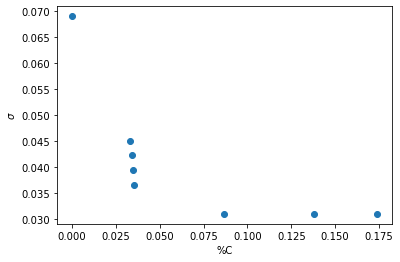

In [105]:
fig = plt.plot()
plt.plot(x, y, 'o')
plt.xlabel(r'%C')
plt.ylabel(r'$\sigma$')
plt.show()

Two approaches were used to fit a curve to the data. The first approach was a polynomial fit using the polyfit function in numpy. This approach provides useful predictions of surface tension for values above 0.04 %C, but does not provide useful information for consentrations lower than this.

A plot showing the fit for a 3rd, 4th, and 5th order polynomial fit are shown below.

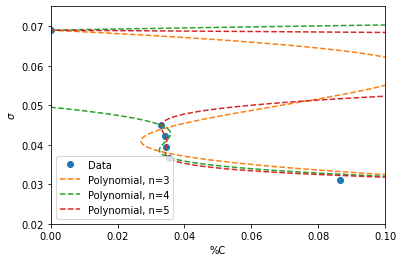

In [106]:
plt.plot(x, y, 'o', label = 'Data')
x_fit = np.arange(0, .1, .0001)

for n in range(3,6):
    z = np.polyfit(y, x, n)
    p = np.poly1d(z)
    plt.plot(p(x_fit), x_fit,'--', label = f'Polynomial, n={n}')

plt.xlim(0, 0.1)
plt.ylim(0.02, 0.075)
plt.legend()
plt.xlabel(r'%C')
plt.ylabel(r'$\sigma$')
plt.show()

A second approach used was to fit the data to a custom function. This was done using the curve_fit function from scipy.optimize. The logistic function was chosen to represent the data.
$$
\begin{align}
\sigma(\%C) = \frac{L}{1+ae^{-k\%C}} + \sigma_0
\end{align}
$$


In [61]:
from scipy.optimize import curve_fit

In [96]:
def logifunc(x,l,a,k, off):
    return l / (1 + a*np.exp(-k*x)) + off

In [97]:
popt, pcov = curve_fit(logifunc, x, y, p0=[.04,8,.1, .011])

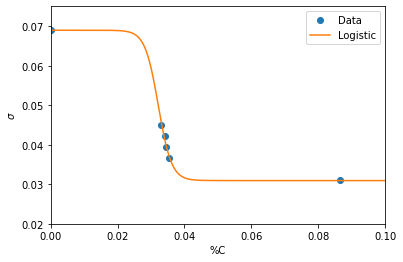

In [103]:
plt.plot(x, y, 'o', label = 'Data')
plt.plot(x_fit, logifunc(x_fit, *popt), label='Logistic')

plt.xlim(0, 0.1)
plt.ylim(0.02, 0.075)
plt.legend()
plt.xlabel(r'%C')
plt.ylabel(r'$\sigma$')
plt.show()

As shown in figure 2, the logistic function matches the data very well. The logistic function should be used to draw estimates on how surface tension varies with the concentration of surfactant.